#**Prédiction de bourses d'études**

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/ Projet: DA, ML, et Deploiement/erasmus.csv")
data.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [ ]:
data.shape

(341, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


In [ ]:
# Verification de presence de valeurs manquantes
data.isna().sum()

,0
INDEX,0
COUNTRIES,0
UNIVERSITIES,0
FACULTIES,0
DEPARTMENTS,2
EXAM SCORE,0
GRANT,0


In [ ]:
#Doublons
data.duplicated().sum()

0

In [ ]:
# Mettre la première lettre en majusculee et les autres en minuscule
data.columns[0].capitalize()

'Index'

In [ ]:
data.columns

Index(['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
       'EXAM SCORE', 'GRANT'],
      dtype='object')

In [ ]:
# Mettre la première lettre en majusculee et les autres en minuscule pour tous les variables
new_columns_names =[]

for element in data.columns:
  new_columns_names.append(element.capitalize())

In [ ]:
new_columns_names

['Index',
 'Countries',
 'Universities',
 'Faculties',
 'Departments',
 'Exam score',
 'Grant']

In [ ]:
data.columns = new_columns_names

In [ ]:
data.head()

,Index,Countries,Universities,Faculties,Departments,Exam score,Grant
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


**Suppression de la colonne Indexe**

In [ ]:
data.drop(columns = ["Index"])

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
...,...,...,...,...,...,...
336,DUTCH,UNIVERSITEIT MAASTRICHT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13,0
337,POLAND,KUJAWSKO - POMORSKA SZKOLA WYZSZA W BYDGOSZCZY,FACULTY OF ENGINEERING,CIVIL ENGINEERING,61.63,0
338,BELGIUM,HOGESCHOOL GENT,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,INTERNATIONAL FINANCE,59.93,0
339,DUTCH,STİCHTİNG HANZEHOGESCHOOL GRONİNGEN,FACULTY OF COMMUNICATION,ADVERTISING DESIGN AND COMMUNICATION,56.58,0


In [ ]:
# Compter les occurrence de chaque valeurs (le nombre de fois que chaque valeurs unique apparait)
data["Grant"].value_counts()

,count
Grant,
0,193
1,148


In [ ]:
# Le resumé statistique d'une variable
data["Exam score"].describe()

,Exam score
count,341.000000
mean,79.138944
std,8.565175
min,51.400000
25%,73.570000
50%,79.300000
75%,85.280000
max,98.500000


In [ ]:
data["Countries"][0].capitalize()

'Italia'

In [ ]:
# Appliquer une transformation à chaque valeur de la colonne "Countries" en capitalisant la première lettre.
data["Countries"] = data["Countries"].apply(lambda x: x.capitalize())

In [ ]:
data.head()

,Index,Countries,Universities,Faculties,Departments,Exam score,Grant
0,1,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,Italia,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,German,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,German,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [ ]:
# Calculer pour cahque pays la variable de la colonne Countries
data.groupby("Countries")["Exam score"].mean().sort_values(ascending =False).head()

,Exam score
Countries,
Ireland,93.276667
Bulgaria,91.500000
Finland,88.443333
Swedish,85.970000
Greece,83.954000


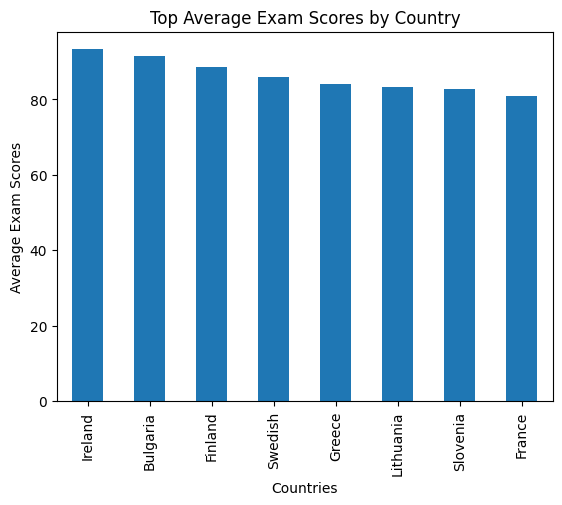

In [ ]:
import matplotlib.pyplot as plt
data.groupby("Countries")["Exam score"].mean().sort_values(ascending =False).head(8).plot(kind="bar")
plt.ylabel("Average Exam Scores")
plt.title("Top Average Exam Scores by Country")
plt.show()

In [ ]:
data.groupby("Departments")["Exam score"].mean().sort_values(ascending =False)

,Exam score
Departments,
TOURISM MANAGEMENT,93.045000
ENGLISH LANGUAGE AND LITERATURE,90.444167
TRANSLATION AND INTERPRETING STUDIES,86.907143
INTERNATIONALES MANAGEMENT (DE),86.760000
INDUSTRIAL DESIGN,86.485000
PLASTIC ARTS AND PAINTING,85.690000
MECHANICAL ENGINEERING,85.064000
PHILOSOPHY,85.040000
NUTRITION AND DIETETICS,84.320000


<Axes: ylabel='Exam score'>

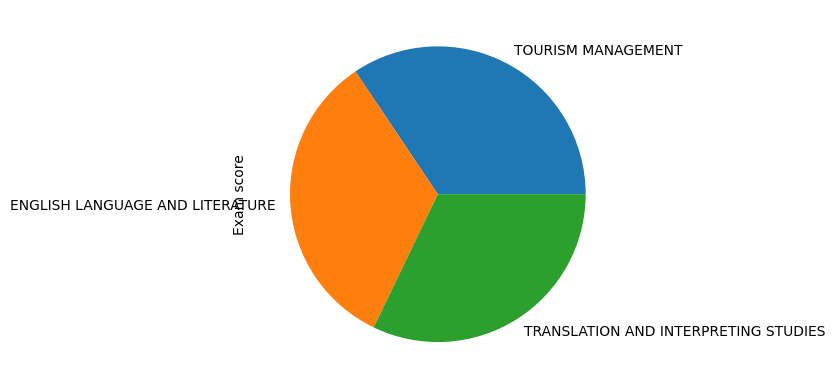

In [ ]:
data.groupby("Departments")["Exam score"].mean().sort_values(ascending =False).head(3).plot(kind="pie")

In [ ]:
data.head()

,Index,Countries,Universities,Faculties,Departments,Exam score,Grant
0,1,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,Italia,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,German,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,German,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [ ]:
#calculer la moyenne des scores d'examen pour chaque combinaison unique de pays (Countries) et de bourse ou subvention (Grant)
data.groupby(["Countries","Grant"])["Exam score"].mean().head(16)

Countries       Grant
Austria         0        71.373333
                1        88.692500
Belgium         0        71.215714
                1        83.465000
Bulgaria        1        91.500000
Croatia         0        65.533333
Czech republic  0        72.192500
Denmark         0        75.910000
                1        83.210000
Dutch           0        73.644857
                1        86.627500
Finland         0        77.080000
                1        94.125000
France          0        75.752857
                1        88.305000
German          0        74.269250
Name: Exam score, dtype: float64

In [ ]:
groupeddata = data.groupby(["Countries","Grant"])["Exam score"].mean().reset_index()
groupeddata[groupeddata["Countries"] == "Spain"]

,Countries,Grant,Exam score
35,Spain,0,73.701538
36,Spain,1,85.328462


**Séparation de données**

In [ ]:
X = data[["Countries","Departments","Exam score"]]
y = data[["Grant"]]

In [ ]:
X["Departments"].nunique()

56

In [ ]:
X

,Countries,Departments,Exam score
0,Italia,ENGLISH LANGUAGE AND LITERATURE,98.50
1,Italia,SOCIOLOGY,97.10
2,German,PSYCHOLOGY,96.80
3,German,NUTRITION AND DIETETICS,96.50
4,Italia,ENGLISH LANGUAGE AND LITERATURE,96.32
...,...,...,...
336,Dutch,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13
337,Poland,CIVIL ENGINEERING,61.63
338,Belgium,INTERNATIONAL FINANCE,59.93
339,Dutch,ADVERTISING DESIGN AND COMMUNICATION,56.58


In [ ]:
y

,Grant
0,1
1,1
2,1
3,1
4,1
...,...
336,0
337,0
338,0
339,0


**Effecutons le pre_processing**

In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [ ]:
#Appliquer l'encodage des variables à la variable "Countries" et l'associer au dataframe avec fit_transform
X["Countries"] = labelencoder.fit_transform(data["Countries"])

<ipython-input-204-c08f57788b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Countries"] = labelencoder.fit_transform(data["Countries"])


In [ ]:
# Le labelencoder sur department
X["Departments"] = labelencoder.fit_transform(data["Departments"])

<ipython-input-205-3fb0d113f301>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Departments"] = labelencoder.fit_transform(data["Departments"])


In [ ]:
X

,Countries,Departments,Exam score
0,13,12,98.50
1,13,48,97.10
2,9,44,96.80
3,9,35,96.50
4,13,12,96.32
...,...,...,...
336,6,41,62.13
337,16,6,61.63
338,1,24,59.93
339,6,0,56.58


**Séparation de données (split)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

**La classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train.values.ravel())

LogisticRegression()

**Metrics d'évaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
log_model_predictions = log_model.predict(X_test)

In [ ]:
accuracy_score(y_test,log_model_predictions)

0.8695652173913043

##**Optimisation des hyperparamètres**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm = SVC()

In [ ]:
param_grid_svc = {"C" : [0.01, 0.1, 0.5, 1], "kernel" :["linear","rbf","poly"]}

In [ ]:
gridsvc = GridSearchCV(svm,param_grid_svc)

In [ ]:
gridsvc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
gridsvc.best_params_

{'C': 1, 'kernel': 'poly'}

In [ ]:
predictions_svc = gridsvc.predict(X_test)
predictions_svc

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0])

In [ ]:
accuracy_score(y_test, predictions_svc)

0.8695652173913043

**Le  model RandomForest**

Ce code prépare un modèle RandomForestClassifier de scikit-learn pour la classification, en définissant les hyperparamètres à tester lors de l'ajustement du modèle à l'aide de la recherche de grille (GridSearchCV ou autre méthode d'optimisation).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# Exemple d'entraînement avec des données fictives
# Remplacer par vos propres données d'entraînement et de test
X_train = pd.DataFrame([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]])  # Exemple de données
y_train = pd.Series([0, 1, 0])  # Labels d'exemple

X_test = pd.DataFrame([[1, 3, 3, 4], [2, 3, 3, 5], [3, 4, 5, 6]])  # Exemple de test
y_test = pd.Series([0, 1, 0])  # Labels de test d'exemple

In [ ]:
# Créer le modèle RandomForest
rfc_model = RandomForestClassifier()

# Définir la grille de paramètres
n_estimators = [32, 64, 128, 256]
max_features = [2, 3, 4]
param_grid_rfc = {"n_estimators": n_estimators, "max_features": max_features}

In [ ]:
grid_rfc = GridSearchCV(rfc_model, param_grid_rfc, cv=2)

In [ ]:
grid_rfc.fit(X_train,y_test.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [ ]:
grid_rfc.best_params_

{'max_features': 2, 'n_estimators': 32}

In [ ]:
predictions = grid_rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, predictions)

1.0

In [ ]:
gridsvc.best_estimator_

SVC(C=1, kernel='poly')

In [ ]:
import joblib
joblib.dump(gridsvc.best_estimator_,"model.pkl")


['model.pkl']

**Application**

In [ ]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import numpy as np

# Définir un modèle de données pour la requête
class Prediction(BaseModel):
    feature1: float
    feature2: float
    feature3: float

# Initialisation de l'application FastAPI
app = FastAPI()

# Charger le modèle de prédiction (assurez-vous que le fichier 'model.pkl' est accessible)
model = pickle.load(open('model.pkl', 'rb'))

# Définir l'endpoint pour la prédiction
@app.post("/predict")
def predict(request: Prediction):
    # Préparer les données d'entrée pour le modèle
    features = np.array([[request.feature1, request.feature2, request.feature3]])

    # Faire la prédiction
    prediction = model.predict(features)

    # Retourner la prédiction sous forme de dictionnaire
    return {"prediction": prediction.tolist()}

if __name__ == "__main__":
    # Lancer le serveur FastAPI sur le port 8002
    uvicorn.run(app, host="0.0.0.0", port=8002)

INFO:     Started server process [195]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8002 (Press CTRL+C to quit)
